# Traveltime computation using scikit-traveltime and scikit-fmm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import traveltime as tt

## Create reference velocity model

Text(0.5, 1.0, 'Velocity model, and Source-Receiver locations')

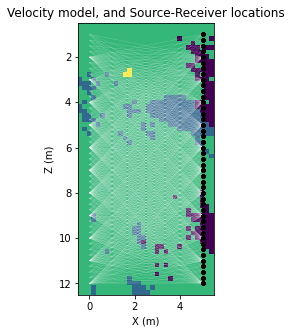

In [58]:
useModel = 2
if (useModel==1):
    dx=0.2;
    x = np.arange(-0.4,5.401,dx)
    y = np.arange(0.6,12.401,dx)

    xx,yy = np.meshgrid(x,y)
    V = 0.1*np.ones_like(xx)
    V[10:20,10:20] = 0.15
else:
    # Load a velocity field from file
    dx=0.2;
    x = np.arange(-0.4,5.401,dx)
    y = np.arange(0.6,12.401,dx)

    xx,yy = np.meshgrid(x,y)
    V=np.loadtxt("AM13_V.dat")

# load traveltime data from file        
AM13=np.loadtxt("AM13_SR_traveltime.dat")
nd,nc=AM13.shape
i_use = np.arange(0,nd,1) # use a subset of the 'nd' data
S = AM13[i_use,0:2:1]
R = AM13[i_use,2:4:1]

nd,ndim = R.shape

# Plot model
fig, (ax0) = plt.subplots(1, 1, figsize=(7, 5))
ax0.pcolor(x,y,V)
ax0.set_aspect('equal', adjustable='box')
ax0.invert_yaxis()

for i in range(nd):
    ax0.plot(R[:,0],R[:,1],'k.')
    ax0.plot([S[i,0],R[i,0]],[S[i,1],R[i,1]],'w-', linewidth=0.1)
ax0.set_xlabel('X (m)')
ax0.set_ylabel('Z (m)')
ax0.set_title('Velocity model, and Source-Receiver locations')

More than one set of sources and receivers (ns=nr=702). using eikonal_traveltime_mul instaed


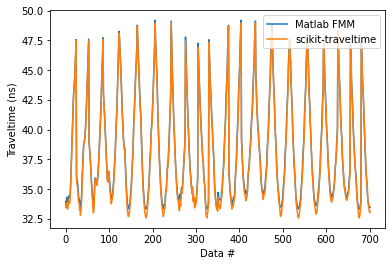

In [60]:

#t = tt.eikonal_traveltime(x,y,[],V,S,R)
t = tt.eikonal_traveltime(x,y,[],V,S,R)
plt.figure(1)
if useModel==2:
    plt.plot(i_use,AM13[i_use,9], label='Matlab FMM')
plt.plot(i_use,t,  label='scikit-traveltime')
plt.legend()
plt.xlabel('Data #')
plt.ylabel('Traveltime (ns)')
plt.show()

## Compute traveltime maps for multiple sources

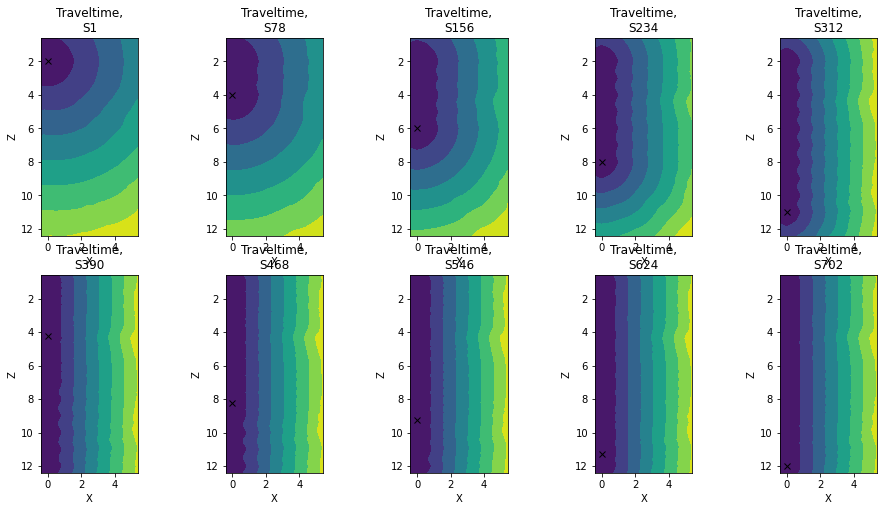

In [94]:
t_map = tt.eikonal(x,y,[],V,S)
i_show = np.linspace(0,S.shape[0]-1,10, dtype=int)
n_show = len(i_show)

plt.figure(1, figsize=(16, 8))
for i in range(n_show):
    plt.subplot(2,5,i+1)
    plt.contourf(x,y,t_map[i_show[i]])
    plt.plot(S[i_show[i],0],S[i_show[i],1],'kx')
    ax0 = plt.gca()
    ax0.set_aspect('equal', adjustable='box')
    ax0.invert_yaxis()
    plt.title('Traveltime,\nS%d' % (i_show[i]+1))
    plt.xlabel('X')
    plt.ylabel('Z')